# Viewing and manipulating FITS images

## Authors
Lia Corrales, Kris Stern, Stephanie T. Douglas, Kelle Cruz, Lúthien Liu, Zihao Chen, Saima Siddiqui

## Learning Goals
1. Open FITS files and load image data
2. Make a 2D histogram with image data
3. Stack several images into a single image
4. Write image data to a FITS file

## Companion Content

* This link provides a comprehensive description of FITS file usage in this tutorial: [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) 

## Keywords
FITS, file input/output, image manipulation, numpy, matplotlib, histogram, colorbar

## Summary

This tutorial demonstrates the use of `astropy.utils.data` to download a data file, then uses `astropy.io.fits` to open the file, and lastly uses `matplotlib` to view the image with different color scales and stretches and to make histograms. In this tutorial we've also included a demonstration of simple image stacking.

## Tutorial in:

https://learn.astropy.org/tutorials/FITS-images.html

In [4]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from astropy.io import fits

In [5]:
from astropy.utils.data import download_file

image_file = download_file(
    "http://data.astropy.org/tutorials/FITS-images/HorseHead.fits", cache=True
)

In [6]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/debian12/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [7]:
image_data = hdu_list[0].data

In [8]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [9]:
hdu_list.close()

## SHORTCUT

In [10]:
image_data = fits.getdata(image_file)

In [11]:
print(type(image_data))  # Show the Python type for image_data
print(image_data.shape)  # Show the number of pixels per side in the 2-D image

<class 'numpy.ndarray'>
(893, 891)


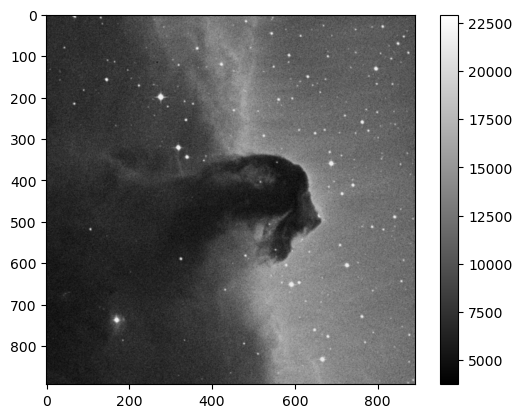

In [12]:
plt.imshow(image_data, cmap="gray")
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [13]:
print("Min:", np.min(image_data))
print("Max:", np.max(image_data))
print("Mean:", np.mean(image_data))
print("Stdev:", np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


## HISTOGRAM

In [14]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

<class 'numpy.ndarray'>
(795663,)


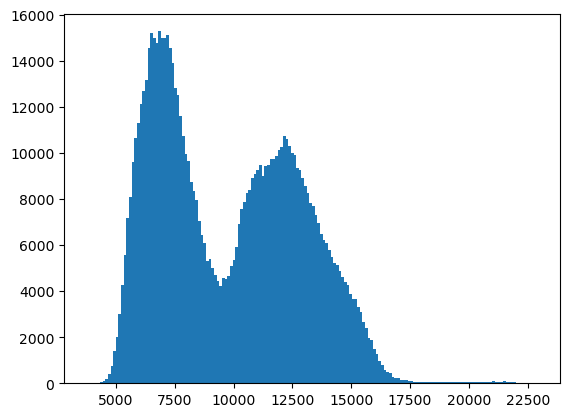

In [15]:
histogram = plt.hist(image_data.flatten(), bins="auto")

## LOGARITHMIC SCALE

In [17]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

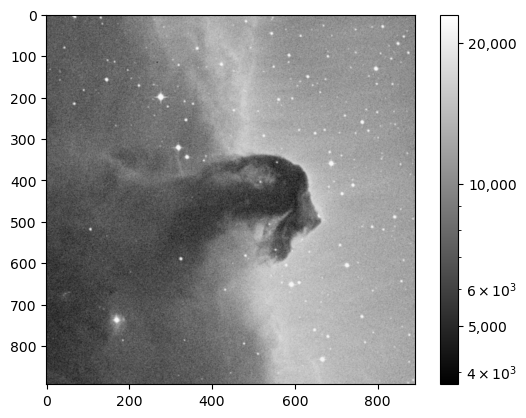

In [18]:
plt.imshow(image_data, cmap="gray", norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.0e3, 1.0e4, 2.0e4])
cbar.ax.set_yticklabels(["5,000", "10,000", "20,000"])

## IMAGE STACKING

In [19]:
base_url = "http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits"

image_list = [download_file(base_url.format(n), cache=True) for n in range(1, 5 + 1)]
image_concat = [fits.getdata(image) for image in image_list]

In [20]:
# The long way
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image

# The short way
# final_image = np.sum(image_concat, axis=0)

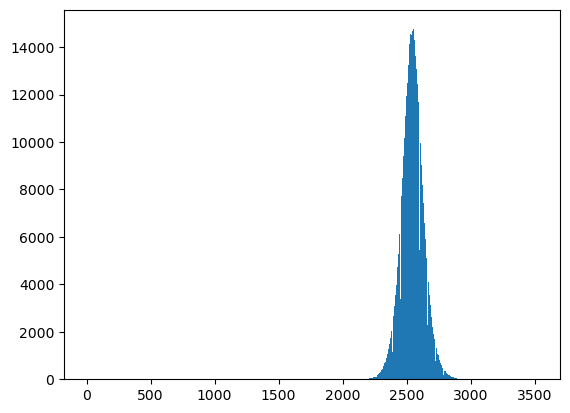

In [21]:
image_hist = plt.hist(final_image.flatten(), bins="auto")

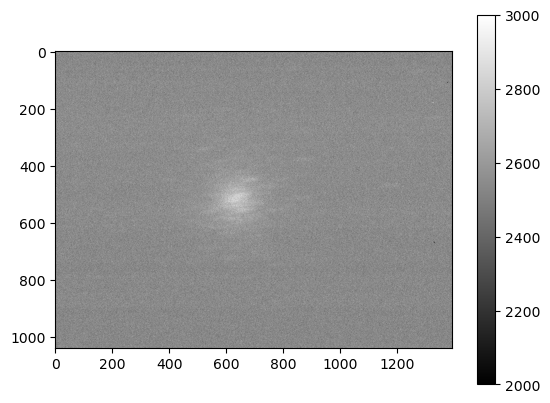

In [22]:
plt.imshow(final_image, cmap="gray", vmin=2e3, vmax=3e3)
plt.colorbar()

## Writing image data to a FITS file

In [23]:
outfile = "stacked_M13_blue.fits"

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

--------------------------------------------------------------------------------------

In [1]:
with open('requirements.txt') as f:
    print(f"Required packages for this notebook:\n{f.read()}")

Required packages for this notebook:
astropy
matplotlib
numpy



In [2]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
import aplpy # visulazing the data in a more better way!
import pandas as pd # for data handling
import shutil 

Download the example FITS files (which contain the image data for the Horsehead Nebula) for this tutorial.

First, we need to download the FITS file image for this tutorial. This is an astronomical image of the Horsehead Nebula taken with a photographic plate. The image has been digitized, that is, the image has been scanned by a computer and converted to a 2-D array. Each position in the array corresponds with the projected position on the sky, and bright areas of the image have high values and dark areas have low values in the array. 

Images taken with astronomical instruments called [CCDs or "charge-coupled devices"](https://en.wikipedia.org/wiki/Charge-coupled_device) are organized similarly. When illuminated by light, CCDs accumulate electrons, converting brightness values to electron counts. A CCD image is essentially a 2-D array, where each position on the array represents a single CCD pixel, and the values in that array represent the number of counts registered in that pixel.

In [3]:
from astropy.utils.data import download_file

# Ruta donde quieres guardar el archivo
ruta_destino = "/home/debian12/Documentos/UD/Astro-Observacional/FITS_IMAGES/FILES/HorseHead.fits"

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

To use your own data in the future, use `astropy.io.fits.open()`

## Opening FITS files and loading the image data

Let's open the FITS file to find out what it contains.

In [24]:
# Copiar desde la caché a tu carpeta
shutil.copy(image_file, ruta_destino)

'/home/debian12/Documentos/UD/Astro-Observacional/FITS_IMAGES/FILES/HorseHead.fits'

In [25]:
hdu_list = fits.open(ruta_destino)
hdu_list.info()

Filename: /home/debian12/Documentos/UD/Astro-Observacional/FITS_IMAGES/FILES/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [26]:
hdu_list = fits.open("HST/hst_11981_05_wfpc2_pc_total_uba305_drz.fits")
hdu_list.info()

FileNotFoundError: [Errno 2] No such file or directory: 'HST/hst_11981_05_wfpc2_pc_total_uba305_drz.fits'

In [ ]:
# displaying the header of the data which contains all the information about the telescope, dimension of the image, observation location, etc..

hdu_list[0].header

Generally, the image information is located in the <code>PRIMARY</code> block. The blocks are numbered and can be accessed by indexing <code>hdu_list</code>.

In [ ]:
image_data = hdu_list[0].data

Our data is now stored as a 2D numpy array.  But how do we know the dimensions of the image?  We can look at the `shape` of the array.

In [ ]:
print(type(image_data))
print(image_data.shape)

Great! At this point, we can close the FITS file because we've stored everything we wanted to a variable. By closing the FITS file, we can make sure that it won't continue using up excess memory or file handles on the computer.

In [ ]:
hdu_list.close()

### SHORTCUT

If you don't need to examine the FITS header, you can call `fits.getdata` to bypass the previous steps.

In [ ]:
image_data = fits.getdata(image_file)

Note that the image data is held in a 2-D numpy array. We can also see the number of pixels in the image by printing the 2-D array shape. This shows us that the image is 893 x 891 pixels.

In [ ]:
print(type(image_data)) # Show the Python type for image_data
print(image_data.shape) # Show the number of pixels per side in the 2-D image

## Viewing the image data and getting basic statistics

In [ ]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps  ie: rainbow, gray
# https://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html

Let's get some basic statistics about our image:

In [ ]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

### Plotting a histogram

To make a histogram with `matplotlib.pyplot.hist()`, we'll need to cast the data from a 2D array to something one dimensional.

In this case, let's use the `ndarray.flatten()` to return a 1D numpy array. Here we use the print statements to check that the "flattened" array is stilly a numpy array, and that the number of entries in the flattened array equals the total number of pixels in the image (that is, 893 x 891 = 795663 pixels total).

In [ ]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

Now make the plot using `matplotlib.pyplot.hist`

In [ ]:
histogram = plt.hist(image_data.flatten(), bins='auto')

### Displaying the image with a logarithmic scale

What if we want to use a logarithmic color scale? To do so, we'll need to load the `LogNorm` object from `matplotlib`.

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
plt.imshow(image_data, cmap='inferno', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
# using the aplpy library which is often used by astronomers...

gc = aplpy.FITSFigure(image_file) # loading the image as an aplpy object
gc.show_grayscale() #displaying the image..

In [ ]:
# using the aplpy library which is often used by astronomers...

gc = aplpy.FITSFigure('HST/hst_11981_05_wfpc2_pc_total_uba305_drz.fits') # loading the image as an aplpy object
gc.show_grayscale() #displaying the image..

In [ ]:
# displaying the image using a different color scale

gc = aplpy.FITSFigure(image_file) # loading the image as an aplpy object
gc.show_colorscale(cmap='gist_heat') #displaying the image.. gist_heat

In [ ]:
# displaying the image using a different color scale

gc = aplpy.FITSFigure('HST/hst_11981_05_wfpc2_pc_total_uba305_drz.fits') # loading the image as an aplpy object
gc.show_colorscale(cmap='inferno') #displaying the image.. gist_heat

## Exercises

# Load the image and make the histogram for:

use the MAST repository: https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html


## Nebulosas

NGC 3372 – Nebulosa de Carina: una de las regiones de formación estelar más impresionantes, con la estrella Eta Carinae.

NGC 1952 (M1) – Nebulosa del Cangrejo: remanente de supernova de 1054, muy estudiada en astrofísica.

NGC 7293 – Nebulosa de Helix (El Ojo de Dios), en Acuario.

NGC 7000 – Nebulosa de Norteamérica, visible en el Cisne.

NGC 2237 – Nebulosa de la Roseta, asociada a un cúmulo estelar joven.

## Galaxias

NGC 224 (M31) – Galaxia de Andrómeda: la más cercana y espectacular a simple vista desde cielos oscuros.

NGC 598 (M33) – Galaxia del Triángulo: otra espiral cercana, con brazos bien definidos.

"NGC 5128" (Centaurus A) – galaxia elíptica con una banda de polvo oscura espectacular. (jw01269-o002_t001_miri_f560w_i2d.fits)

NGC 253 – Galaxia del Escultor: una espiral brillante, llena de polvo y gas. (jw02987-o003_t001_miri_f770w_i2d.fits)

NGC 1300 – preciosa espiral barrada con brazos muy simétricos.

NGC 1365 – otra espiral barrada, a veces llamada “la más bella de su tipo”.

## Cúmulos estelares

NGC 104 (47 Tucanae) – cúmulo globular, enorme y brillante cerca de la Pequeña Nube de Magallanes.

NGC 5139 (Omega Centauri) – el cúmulo globular más grande y espectacular del cielo.

NGC 869 y NGC 884 – Doble Cúmulo de Perseo: dos cúmulos abiertos muy cercanos entre sí, visibles incluso a simple vista.

NGC 4755 – El Joyero, cúmulo abierto en la Cruz del Sur, con estrellas de colores contrastantes.

Filename: /home/debian12/Documentos/UD/Astro-Observacional/FITS_IMAGES/fits/NGC 1952/hst_5354_04_wfpc2_pc_total_u2bx04_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1044   ()      
  1  SCI           1 ImageHDU       107   (4680, 4688)   float32   
  2  WHT           1 ImageHDU        89   (4680, 4688)   float32   
  3  CTX           1 ImageHDU        92   (4680, 4688)   int32   
  4  HDRTAB        1 BinTableHDU    560   16R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, 8A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, 8A, 18A, D, D, D, D, D, D, 8A, D, 6A, 19A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, D, D, D, D, D, D, D, D, D, 12A, 12A, 8A, 18A, D, D, 19A, 10A, D, D, D, 2A, D, 3A, D, D, 8A, D, K, D, 6A, 9A, D, D, D, 4A, 44A, 3A, K, D, D, D, D, 8A, D, D, D, D, D, 23A, 1A, D, 23A, D, D, D, 3A, L, D, 5A, 21A, D, 6A, D, D, D, D, D, D, D, D, D, D, D, L, K, K, D, D, D,

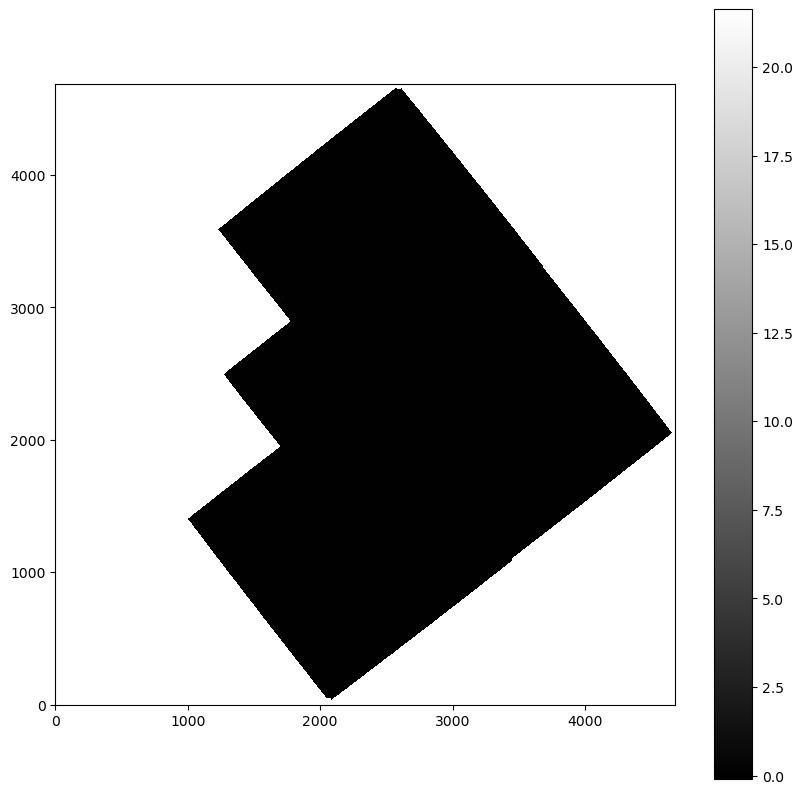

In [10]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import aplpy
from matplotlib.colors import LogNorm

# Ruta al archivo descargado de MAST
image_file = "/home/debian12/Documentos/UD/Astro-Observacional/FITS_IMAGES/fits/NGC 1952/hst_5354_04_wfpc2_pc_total_u2bx04_drz.fits"   # aquí pones el nombre real del FITS

# Abrir con astropy
hdu_list = fits.open(image_file)
hdu_list.info()   # muestra las extensiones disponibles

# Leer los datos (normalmente la ciencia está en hdu_list[1].data o [0].data)
image_data = hdu_list[1].data
header = hdu_list[1].header

plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.show()

hdu_list.close()


INFO: Auto-setting vmin to -6.595e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.552e-02 [aplpy.core]
INFO: Auto-setting vmin to -1.264e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.928e-02 [aplpy.core]


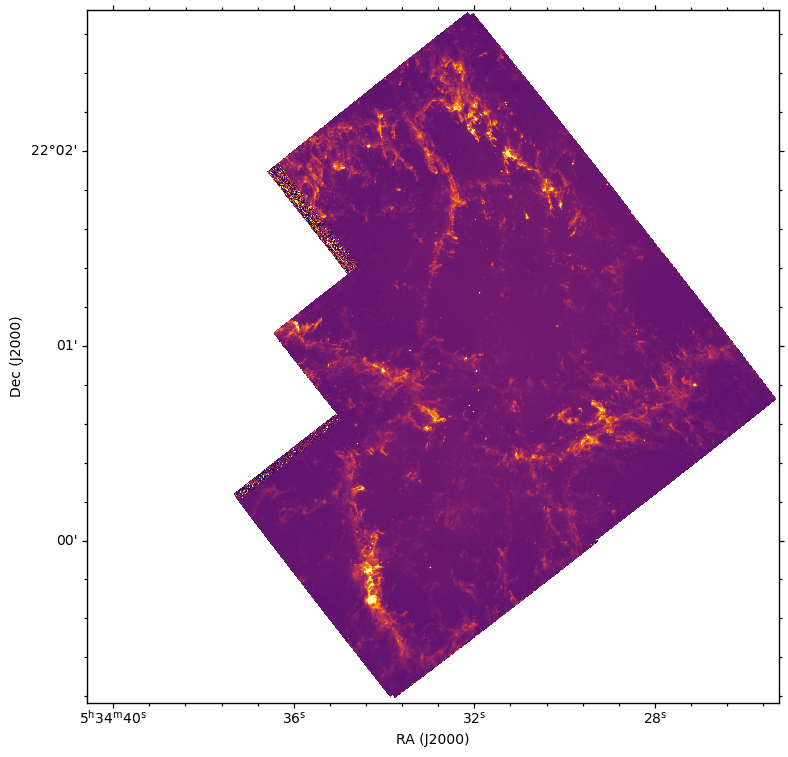

In [11]:
import aplpy

gc = aplpy.FITSFigure(image_file)  
gc.show_grayscale()   # escala en blanco y negro
gc.show_colorscale(cmap='inferno')  # escala de colores


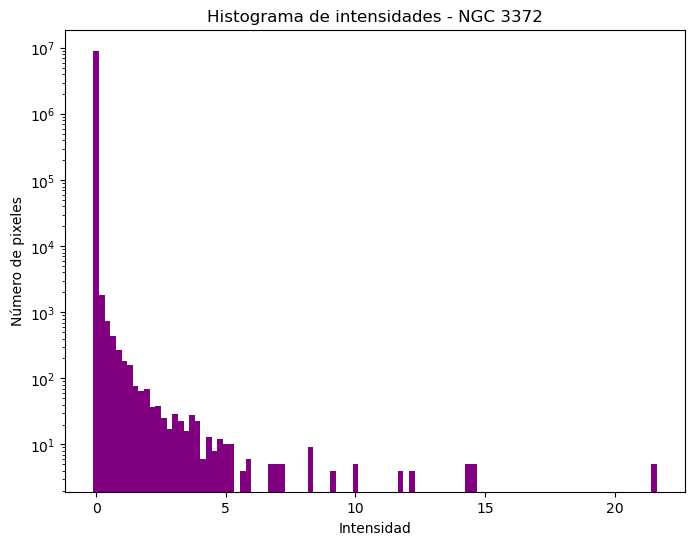

In [12]:
plt.figure(figsize=(8,6))
plt.hist(image_data.flatten(), bins=100, log=True, color='purple')
plt.xlabel("Intensidad")
plt.ylabel("Número de pixeles")
plt.title("Histograma de intensidades - NGC 3372")
plt.show()


-------------------------------------------------------------


In [ ]:
hdu_list = fits.open("/home/debian12/Documentos/UD/Astro-Observacional/FITS_IMAGES/fits/NGC 2237/ifif01050_drc.fits")
hdu_list.info()

In [ ]:
# displaying the header of the data which contains all the information about the telescope, dimension of the image, observation location, etc..

hdu_list[1].header

In [ ]:
image_data = hdu_list[1].data

In [ ]:
print(type(image_data))
print(image_data.shape)

In [ ]:
hdu_list.close()

In [ ]:
plt.imshow(image_data, cmap='inferno')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps  ie: rainbow, gray
# https://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html

In [ ]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

In [ ]:
# using the aplpy library which is often used by astronomers...

gc = aplpy.FITSFigure(image_data) # loading the image as an aplpy object
gc.show_grayscale() #displaying the image..
gc.show_colorscale(cmap='inferno')  # escala de colores

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(image_data.flatten(), bins=100, log=True, color='purple')
plt.xlabel("Intensidad")
plt.ylabel("Número de pixeles")
plt.title("Histograma de intensidades")
plt.show()